In [45]:
import pandas as pd
import matplotlib as plt
from scipy.stats import t, f
import numpy as np


In [61]:
salaries = pd.read_csv('http://www.stanford.edu/class/stats191/data/math-salaries.table', delim_whitespace=True)
salaries.to_csv('salaries.csv', index=False)
salary_levels = pd.read_csv('http://web.stanford.edu/class/stats191/data/salary_levels.table', delim_whitespace=True)
salary_levels.to_csv('salary_levels.csv', index=False)

In [62]:
salaries = pd.read_csv('salaries.csv')
salary_levels = pd.read_csv('salary_levels.csv')

salaries.head()

,Y,X1,X2,X3
0,33.2,3.5,9.0,6.1
1,40.3,5.3,20.0,6.4
2,38.7,5.1,18.0,7.4
3,46.8,5.8,33.0,6.7
4,41.4,4.2,31.0,7.5


In [63]:
salary_levels.head()

,L1,L2,L3,L4,L5
0,5,7,3,5,4
1,6,3,2,5,7
2,4,2,3,6,6


array([[<Axes: xlabel='Y', ylabel='Y'>, <Axes: xlabel='X1', ylabel='Y'>,
        <Axes: xlabel='X2', ylabel='Y'>, <Axes: xlabel='X3', ylabel='Y'>],
       [<Axes: xlabel='Y', ylabel='X1'>,
        <Axes: xlabel='X1', ylabel='X1'>,
        <Axes: xlabel='X2', ylabel='X1'>,
        <Axes: xlabel='X3', ylabel='X1'>],
       [<Axes: xlabel='Y', ylabel='X2'>,
        <Axes: xlabel='X1', ylabel='X2'>,
        <Axes: xlabel='X2', ylabel='X2'>,
        <Axes: xlabel='X3', ylabel='X2'>],
       [<Axes: xlabel='Y', ylabel='X3'>,
        <Axes: xlabel='X1', ylabel='X3'>,
        <Axes: xlabel='X2', ylabel='X3'>,
        <Axes: xlabel='X3', ylabel='X3'>]], dtype=object)

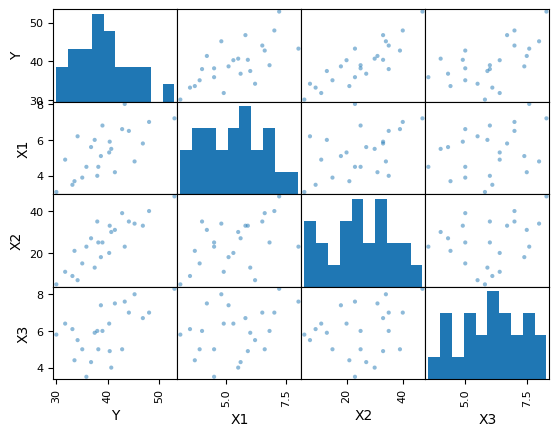

In [18]:
pd.plotting.scatter_matrix(salaries)

In [19]:
salaries.corr()

,Y,X1,X2,X3
Y,1.000000,0.667096,0.858558,0.558196
X1,0.667096,1.000000,0.466951,0.322761
X2,0.858558,0.466951,1.000000,0.253753
X3,0.558196,0.322761,0.253753,1.000000


In [32]:
salaries['ones'] = 1
X = salaries[['ones', 'X1', 'X2', 'X3']].to_numpy()
Y = np.expand_dims(salaries['Y'].to_numpy(), axis=1)
b = np.linalg.inv(X.T@X)@X.T@Y
print(f'y={round(b[0][0], 3)}+{round(b[1][0], 3)}x1+{round(b[2][0], 3)}x2+{round(b[3][0], 3)}x3')

y=17.847+1.103x1+0.322x2+1.289x3


3:

$ H_{0}: \beta_{1}=\beta_{2}=\beta_{3}=0 $  
$ H_{1}: \beta{1}\ne0 \lor \beta{2}\ne0 \lor \beta{3}\ne0 $
using:  
$ F_{n} = {MSR\over MSE} \sim F_{p-1,n-p} $  
and we will test by $ \varphi_{\alpha}(F_{n}) = 1\{F_{n}\ > q_{1-{\alpha}}\} $  
and $ p\_val = P(F_{p-1, n-p} > F_{n}) $

In [34]:
n = X.shape[0]
p = X.shape[1]

In [53]:
ssr = ((Y.mean() - X@b) ** 2).sum()
msr = ssr / (p-1)
sse = ((Y - X@b) ** 2).sum()
mse = sse / (n-p)
F = msr/mse
p_val = 1 - f.cdf(F, p-1, n-p)
p_val

1.1239742470081637e-10

so we reject the null

4:

we want our params to be in the intervals in probability $1-\alpha$, if for each param the probability  
it won't be in the interval is $\alpha \over 3$ then the probability that one of them will be outside is $\alpha$, like we wanted.  
Here we will use:  
$ {b_{j} - c \over \sqrt{\hat{\sigma}^2e_{j}^T(X^TX)^{-1}e_{j}}} \sim t_{n-p} $  
unser the assumption $ \beta_{j} = c $

In [51]:
confidence = 0.9
alpha = 1-confidence
ad_alpha = alpha/3
t_val = t.ppf(1 - ad_alpha/2, n - p)

j = 1
center = b[j][0]
se = np.sqrt(mse * np.linalg.inv(X.T@X)[j, j])
length = se * t_val
print(f'interval for beta{j}:',[center - length, center + length])

j = 2
center = b[j][0]
se = np.sqrt(mse * np.linalg.inv(X.T@X)[j, j])
length = se * t_val
print(f'interval for beta{j}:',[center - length, center + length])

j = 3
center = b[j][0]
se = np.sqrt(mse * np.linalg.inv(X.T@X)[j, j])
length = se * t_val
print(f'interval for beta{j}:',[center - length, center + length])

interval for beta1: [0.34989146610182364, 1.8563693241774715]
interval for beta2: [0.2367079657178635, 0.4063313971815415]
interval for beta3: [0.6067676624378334, 1.9711141290850782]


5:

In [55]:
sst = sse + ssr
mst = sst / (n-1)
print('R^2:', ssr/sst)
print('adjusted R^2:', 1 - mse/mst )

R^2: 0.91085656554165
adjusted R^2: 0.8974850503728974


we have 5 variables so $adj\_\alpha = {\alpha \over 5} $  
we will use: 
$a^t\hat{\beta} \pm t_{n-p, 1-{\alpha \over 2}}\hat{\sigma}\sqrt{a^T(X^TX)^{-1}a+1}$  

In [70]:
var_x = np.concatenate((np.ones((5, 1)), salary_levels.to_numpy().T), axis=1)

In [91]:
confidence = 0.95
alpha = 1 - confidence
adj_alpha = alpha/5

centers =  (var_x @ b).squeeze()
se = np.sqrt(mse * var_x@np.linalg.inv(X.T@X)@var_x.T+1).diagonal()
t_val = t.ppf(1- adj_alpha/2, n-p)
lengths = se * t_val

lower_bounds = centers - lengths
upper_bounds = centers + lengths

for i in range(5):
    print(f'PI {i+1}: [{lower_bounds[i]}, {upper_bounds[i]}]')

PI 1: [26.64843111016819, 34.24649745769528]
PI 2: [23.462810883362824, 34.7597575933152]
PI 3: [21.46703720785817, 29.865330536326177]
PI 4: [29.084747041375937, 36.32290574663395]
PI 5: [28.73231570812051, 35.75515501540889]
